#Tugas Besar Machine Learning



*   Nama : Andrea Rahmadanisya
*   NIM : 1301184146

*   Nama : Rizka Nur Octvaniani
*   NIM  : 1301184125


# Supervised

## Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#lib for model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as recall

In [ ]:
DataTrain = pd.read_csv('kendaraan_train.csv')
DataTest = pd.read_csv('kendaraan_test.csv')

DataTrain = DataTrain.drop(["id"], axis=1)
DataTrain.head(3)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0


In [ ]:
DataTrain["Tertarik"].value_counts()

0    250825
1     35006
Name: Tertarik, dtype: int64

## Clean Data Train

In [ ]:
#fill NAN/missing value numerik using mean
DataTrain['Umur'].fillna(DataTrain['Umur'].mean(), inplace=True)
DataTrain['SIM'].fillna(DataTrain['SIM'].mean(), inplace=True)
DataTrain['Kode_Daerah'].fillna(DataTrain['Kode_Daerah'].mean(), inplace=True)
DataTrain['Sudah_Asuransi'].fillna(DataTrain['Sudah_Asuransi'].mean(), inplace=True)
DataTrain['Premi'].fillna(DataTrain['Premi'].mean(), inplace=True)
DataTrain['Kanal_Penjualan'].fillna(DataTrain['Kanal_Penjualan'].mean(), inplace=True)
DataTrain['Lama_Berlangganan'].fillna(DataTrain['Lama_Berlangganan'].mean(), inplace=True)
DataTrain['Tertarik'].fillna(DataTrain['Tertarik'].mean(), inplace=True)

#fill missing value categorical using modus
DataTrain['Jenis_Kelamin'].fillna('Pria', inplace=True)
DataTrain['Umur_Kendaraan'].fillna('1-2 Tahun', inplace=True)
DataTrain['Kendaraan_Rusak'].fillna('Pernah', inplace=True)

# len(DataTrain)
DataTrain.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
DataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285831 non-null  object 
 1   Umur               285831 non-null  float64
 2   SIM                285831 non-null  float64
 3   Kode_Daerah        285831 non-null  float64
 4   Sudah_Asuransi     285831 non-null  float64
 5   Umur_Kendaraan     285831 non-null  object 
 6   Kendaraan_Rusak    285831 non-null  object 
 7   Premi              285831 non-null  float64
 8   Kanal_Penjualan    285831 non-null  float64
 9   Lama_Berlangganan  285831 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


In [ ]:
DataTrain['Jenis_Kelamin']= LabelEncoder().fit_transform(DataTrain['Jenis_Kelamin']) 
DataTrain['Umur_Kendaraan']= LabelEncoder().fit_transform(DataTrain['Umur_Kendaraan']) 
# Train['Kendaraan_Rusak']= LabelEncoder().fit_transform(Train['Kendaraan_Rusak']) 

# Train['Jenis_Kelamin'] = (Train['Jenis_Kelamin']=='Pernah').astype(int)
# Train['Umur_Kendaraan'] = (Train['Umur_Kendaraan']=='Pernah').astype(int)
DataTrain['Kendaraan_Rusak'] = (DataTrain['Kendaraan_Rusak']=='Pernah').astype(int)

DataTrain.head(3)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,1,0,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
2,0,21.0,1.0,46.0,1.0,1,0,32733.0,160.0,119.0,0


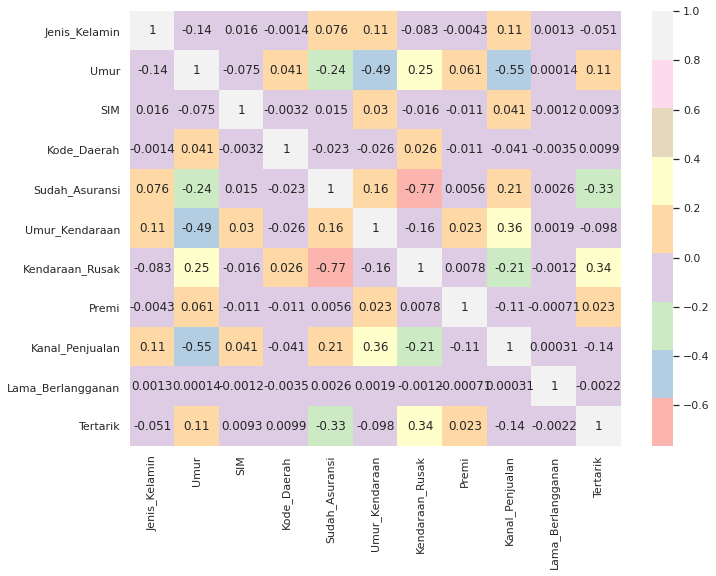

In [ ]:
#check correlation
sns.set(rc={'figure.figsize':(11,8)})
def heatmap(data):
  sns.heatmap(data.corr(), vmax=1, annot=True, cmap='Pastel1')

heatmap(DataTrain)

<Figure size 4320x4320 with 0 Axes>

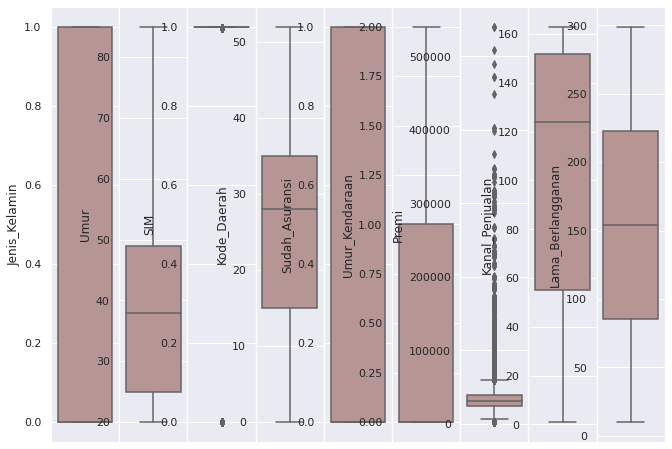

In [ ]:
#outlier
def Check_outlier(data):
  plt.figure(figsize=(60, 60))
  f, axes = plt.subplots(1, 9)
  sns.boxplot(y= data['Jenis_Kelamin'], ax= axes[0], color='rosybrown')
  sns.boxplot(y= data['Umur'], ax= axes[1], color='rosybrown')
  sns.boxplot(y= data['SIM'], ax=axes[2], color='rosybrown')
  sns.boxplot(y= data['Kode_Daerah'], ax=axes[3], color='rosybrown')
  sns.boxplot(y= data['Sudah_Asuransi'], ax=axes[4], color='rosybrown')
  sns.boxplot(y= data['Umur_Kendaraan'], ax=axes[5], color='rosybrown')
  sns.boxplot(y= data['Premi'], ax=axes[6], color='rosybrown')
  sns.boxplot(y= data['Kanal_Penjualan'], ax=axes[7], color='rosybrown')
  sns.boxplot(y= data['Lama_Berlangganan'], ax=axes[8], color='rosybrown')
  plt.subplots_adjust(wspace=0)

Check_outlier(DataTrain)

In [ ]:
#handle outlier 
while True:
  qlo1, qlo3 = np.percentile(DataTrain['SIM'],[25,75])
  iqrlo = qlo3 - qlo1
  lowerlo = qlo1 - (1.5 * iqrlo)
  upperlo = qlo3 + (1.5 * iqrlo)
  outlierlo = DataTrain[(DataTrain['SIM'] < (lowerlo)) | (DataTrain['SIM'] > (upperlo))]
  print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
  idxlo = outlierlo.index
  DataTrain.drop(idxlo, inplace=True) #drop outlier data
  if (outlierlo.shape[0] <= 0):
    break

DataTrain['SIM'].describe()

amount of outlier data 14988
amount of outlier data 0


count    270843.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: SIM, dtype: float64

In [ ]:
#handle outlier 
while True:
  qlo1, qlo3 = np.percentile(DataTrain['Premi'],[25,75])
  iqrlo = qlo3 - qlo1
  lowerlo = qlo1 - (1.5 * iqrlo)
  upperlo = qlo3 + (1.5 * iqrlo)
  outlierlo = DataTrain[(DataTrain['Premi'] < (lowerlo)) | (DataTrain['Premi'] > (upperlo))]
  print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
  idxlo = outlierlo.index
  DataTrain.drop(idxlo, inplace=True) #drop outlier data
  if (outlierlo.shape[0] <= 0):
    break

DataTrain['Premi'].describe()

amount of outlier data 52237
amount of outlier data 3477
amount of outlier data 1135
amount of outlier data 402
amount of outlier data 141
amount of outlier data 35
amount of outlier data 13
amount of outlier data 5
amount of outlier data 0


count    213398.000000
mean      33913.436991
std        7871.633954
min       12867.000000
25%       28498.000000
50%       32482.000000
75%       38947.000000
max       54620.000000
Name: Premi, dtype: float64

In [ ]:
#handle outlier 
while True:
  qlo1, qlo3 = np.percentile(DataTrain['Lama_Berlangganan'],[25,75])
  iqrlo = qlo3 - qlo1
  lowerlo = qlo1 - (1.5 * iqrlo)
  upperlo = qlo3 + (1.5 * iqrlo)
  outlierlo = DataTrain[(DataTrain['Lama_Berlangganan'] < (lowerlo)) | (DataTrain['Lama_Berlangganan'] > (upperlo))]
  print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
  idxlo = outlierlo.index
  DataTrain.drop(idxlo, inplace=True) #drop outlier data
  if (outlierlo.shape[0] <= 0):
    break

DataTrain['Lama_Berlangganan'].describe()

amount of outlier data 0


count    213398.000000
mean        154.276252
std          81.682495
min          10.000000
25%          85.000000
50%         154.286302
75%         223.000000
max         299.000000
Name: Lama_Berlangganan, dtype: float64

<Figure size 4320x4320 with 0 Axes>

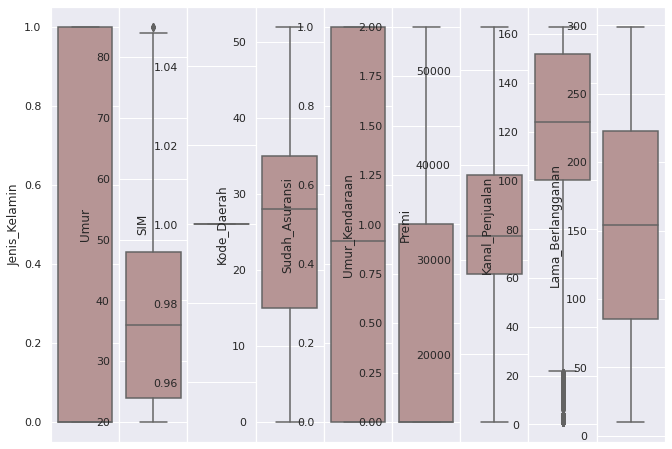

In [ ]:
#outlier
def Check_outlierdone(data):
  plt.figure(figsize=(60, 60))
  f, axes = plt.subplots(1, 9)
  sns.boxplot(y= data['Jenis_Kelamin'], ax= axes[0], color='rosybrown')
  sns.boxplot(y= data['Umur'], ax= axes[1], color='rosybrown')
  sns.boxplot(y= data['SIM'], ax=axes[2], color='rosybrown')
  sns.boxplot(y= data['Kode_Daerah'], ax=axes[3], color='rosybrown')
  sns.boxplot(y= data['Sudah_Asuransi'], ax=axes[4], color='rosybrown')
  sns.boxplot(y= data['Umur_Kendaraan'], ax=axes[5], color='rosybrown')
  sns.boxplot(y= data['Premi'], ax=axes[6], color='rosybrown')
  sns.boxplot(y= data['Kanal_Penjualan'], ax=axes[7], color='rosybrown')
  sns.boxplot(y= data['Lama_Berlangganan'], ax=axes[8], color='rosybrown')
  plt.subplots_adjust(wspace=0)

Check_outlierdone(DataTrain)